# ***Human Activity Recognition with Smartphone ***

**Description:** 
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

- The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities


1.   WALKING
2.   WALKING UPSTAIRS
3.   WALKING DOWNSTAIRS
4.   SITTING
5.   STANDING
6.   LAYING
<br>wearing a smartphone (Samsung Galaxy S II) on the waist.

<br> **Two embeded sensors from smartphone are used**
1. accelerometer - Captures 3-axial (XYZ) linear acceleration at a constant rate of 50Hz.
2. gyroscope - Captures 3-axial (XYZ) angular velocity at a constant rate of 50Hz.

**Data Collection:**
<br>1. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.
<br> 2. The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window)

<br> 3. Two sensors (Gyroscope and accelerometer) in a smartphone are used to record,
 1. '3-axial linear acceleration'(tAcc-XYZ) from accelerometer 
 2. '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.

**Attribute information**
1. For each record in the dataset the following is provided:
2. Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
3. Triaxial Angular velocity from the gyroscope.
4. A 561-feature vector with time and frequency domain variables.
5. Its activity label.
6. An identifier of the subject who carried out the experiment.

**Relevant papers** 
1. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. International Workshop of Ambient Assisted Living (IWAAL 2012). Vitoria-Gasteiz, Spain. Dec 2012

2. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz. Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science. Special Issue in Ambient Assisted Living: Home Care. Volume 19, Issue 9. May 2013

3. Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. 4th International Workshop of Ambient Assited Living, IWAAL 2012, Vitoria-Gasteiz, Spain, December 3-5, 2012. Proceedings. Lecture Notes in Computer Science 2012, pp 216-223.

4. Jorge Luis Reyes-Ortiz, Alessandro Ghio, Xavier Parra-Llanas, Davide Anguita, Joan Cabestany, Andreu Català. Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.

**Dataset:**  https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones?select=train.csv

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [83]:
%%time 
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

CPU times: user 1.25 s, sys: 355 ms, total: 1.61 s
Wall time: 1.61 s


In [84]:
%%time
df = pd.concat([dfTrain,dfTest])
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis = 1)

CPU times: user 68.4 ms, sys: 35 ms, total: 103 ms
Wall time: 106 ms


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [ ]:
print("Number of Data Points: ", df.shape[0])
print("Number of Fatures    : ", df.shape[1])

Number of Data Points:  10299
Number of Fatures    :  563


In [86]:
print(df.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [87]:
y = df['Activity'].copy()
X = df.drop('Activity',inplace = False, axis = 1)

In [88]:
columnNames = list()
columnNames = df.columns
columnNames

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [89]:
list(columnNames)

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [90]:
badChars = ['-', '()','(',')', ',']

In [91]:
newColumnNames = []
for colName in columnNames:
  newColumnName = ''.join(i for i in colName if i not in badChars)
  newColumnNames.append(newColumnName)

In [ ]:
newColumnNames

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

In [ ]:
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject  Activity
0           0.288585          -0.020294  ...        1  STANDING
1           0.278419          -0.016411  ...        1  STANDING
2           0.279653          -0.019467  ...        1  STANDING
3           0.279174          -0.026201  ...        1  STANDING
4           0.276629          -0.016570  ...        1  STANDING

[5 rows x 563 columns]

In [92]:
df.columns = newColumnNames

In [ ]:
df.head()

tBodyAccmeanX  tBodyAccmeanY  ...  subject  Activity
0       0.288585      -0.020294  ...        1  STANDING
1       0.278419      -0.016411  ...        1  STANDING
2       0.279653      -0.019467  ...        1  STANDING
3       0.279174      -0.026201  ...        1  STANDING
4       0.276629      -0.016570  ...        1  STANDING

[5 rows x 563 columns]

In [ ]:
df.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64

In [ ]:
%%time
df.isnull().any().sum()

CPU times: user 13.8 ms, sys: 1.13 ms, total: 14.9 ms
Wall time: 17.1 ms


0

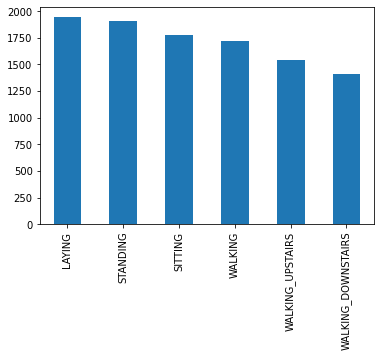

In [ ]:
df.Activity.value_counts().plot.bar()

In [ ]:
%%time
df.groupby('Activity').mean()

CPU times: user 56.1 ms, sys: 7.96 ms, total: 64.1 ms
Wall time: 68.7 ms


tBodyAccmeanX  tBodyAccmeanY  ...  angleZgravityMean    subject
Activity                                          ...                              
LAYING                   0.268649      -0.018318  ...          -0.427749  16.643519
SITTING                  0.273060      -0.012690  ...          -0.089532  16.680360
STANDING                 0.279153      -0.016152  ...           0.031743  16.513116
WALKING                  0.276337      -0.017907  ...           0.059771  15.272938
WALKING_DOWNSTAIRS       0.288137      -0.016312  ...           0.055866  15.828592
WALKING_UPSTAIRS         0.262295      -0.025923  ...           0.122794  15.716969

[6 rows x 562 columns]

In [ ]:
%%time
df.groupby('Activity').mean()['tBodyAccmeanX']

CPU times: user 51.3 ms, sys: 0 ns, total: 51.3 ms
Wall time: 66.7 ms


Activity
LAYING                0.268649
SITTING               0.273060
STANDING              0.279153
WALKING               0.276337
WALKING_DOWNSTAIRS    0.288137
WALKING_UPSTAIRS      0.262295
Name: tBodyAccmeanX, dtype: float64

In [ ]:
%%time
df.groupby('Activity').mean()['tBodyAccstdX']

CPU times: user 52.1 ms, sys: 0 ns, total: 52.1 ms
Wall time: 62.3 ms


Activity
LAYING               -0.960932
SITTING              -0.983446
STANDING             -0.984435
WALKING              -0.314644
WALKING_DOWNSTAIRS    0.100766
WALKING_UPSTAIRS     -0.237990
Name: tBodyAccstdX, dtype: float64

In [ ]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


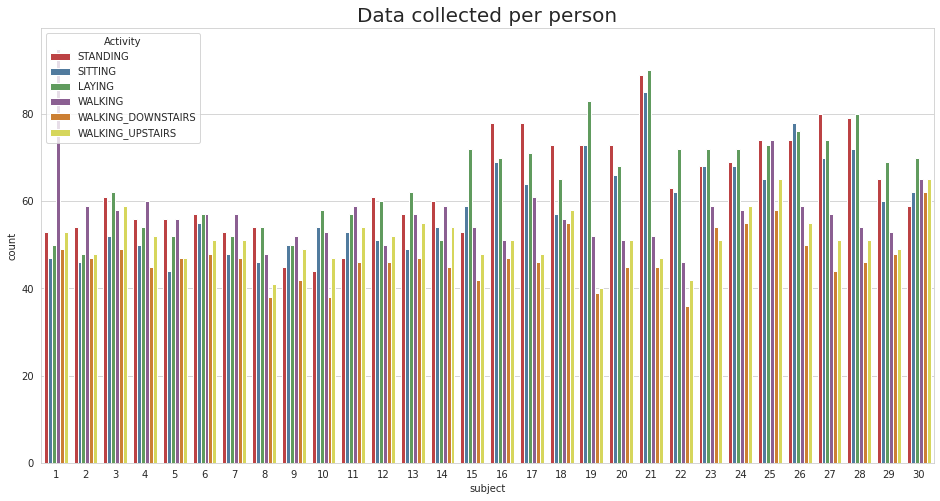

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data collected per person', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

## Activities
1. Non Moving: SITTING, STANDING, LAYING
2. Moving    : WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

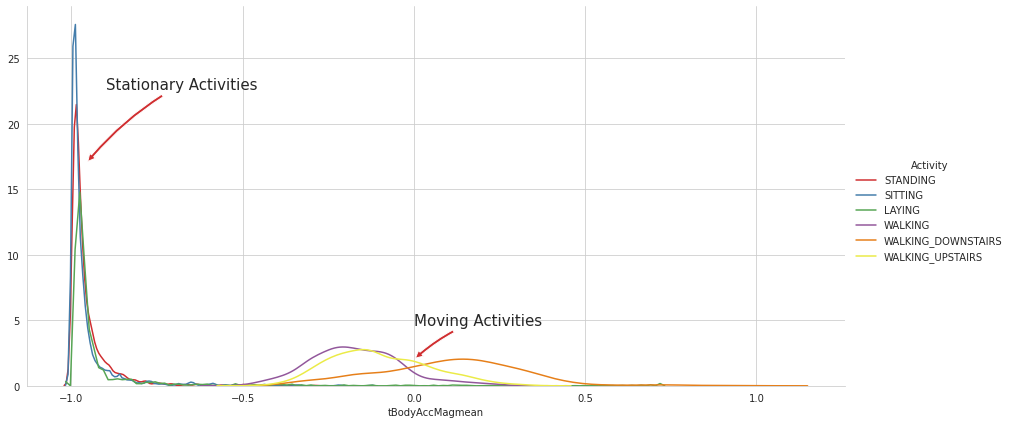

In [ ]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

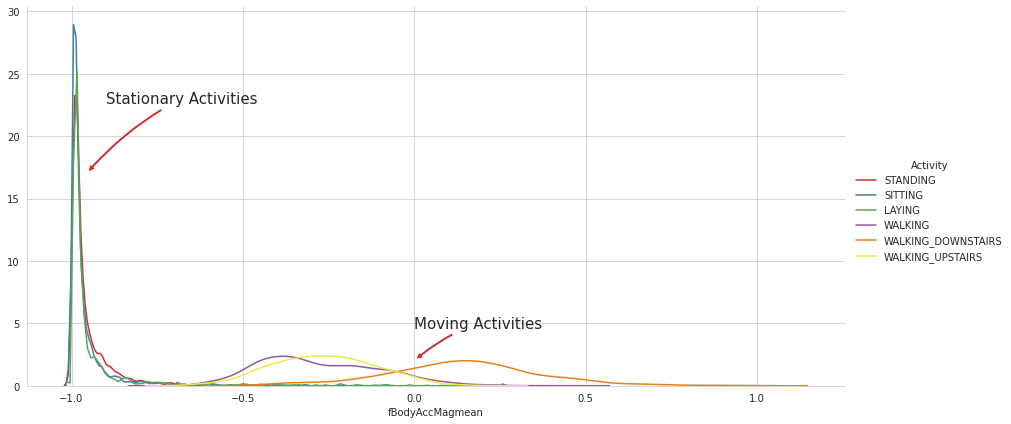

In [ ]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'fBodyAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

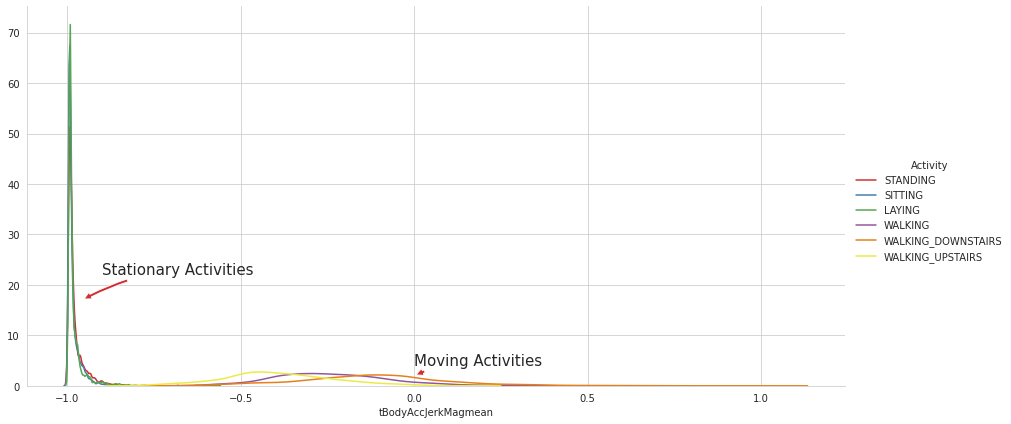

In [ ]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccJerkMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))


In [ ]:
df['tBodyAccJerkMagmean'].max()

1.0

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 5, 'Moving Activities')

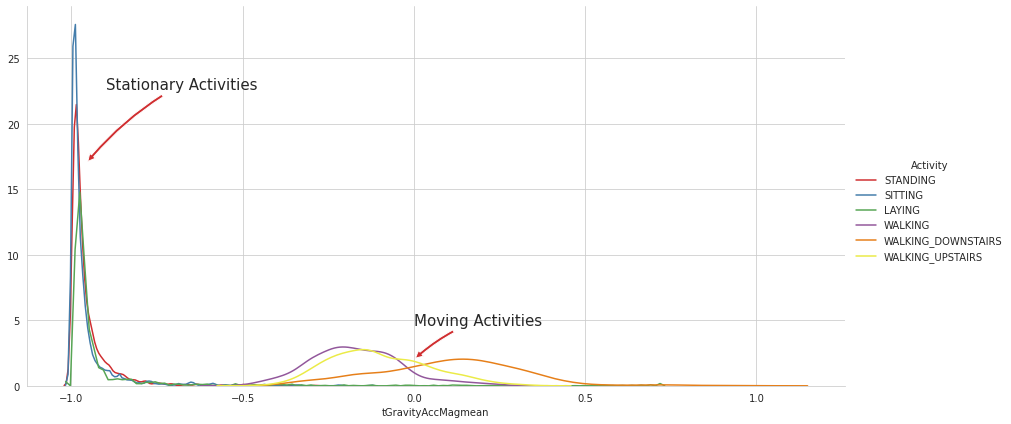

In [ ]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tGravityAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))


**Obervations**
1. All features value is in range (-1,1) 
2. Distributions of static and moving activities are completly seperable

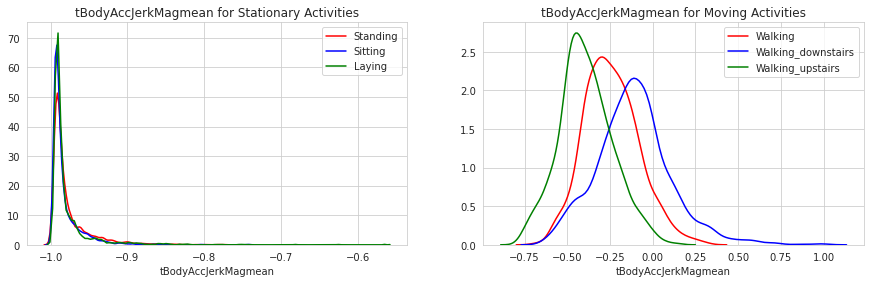

In [ ]:
df1 = df[df['Activity'] == 'STANDING']
df2 = df[df['Activity'] == 'SITTING']
df3 = df[df['Activity'] == 'LAYING']
df4 = df[df['Activity'] == 'WALKING']
df5 = df[df['Activity'] == 'WALKING_DOWNSTAIRS']
df6 = df[df['Activity'] == 'WALKING_UPSTAIRS']

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccJerkMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccJerkMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccJerkMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccJerkMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('tBodyAccJerkMagmean for Moving Activities')
sns.distplot(df4['tBodyAccJerkMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccJerkMagmean'],color='b',hist=False,label="Walking_downstairs")
sns.distplot(df6['tBodyAccJerkMagmean'],color='g',hist=False,label="Walking_upstairs")

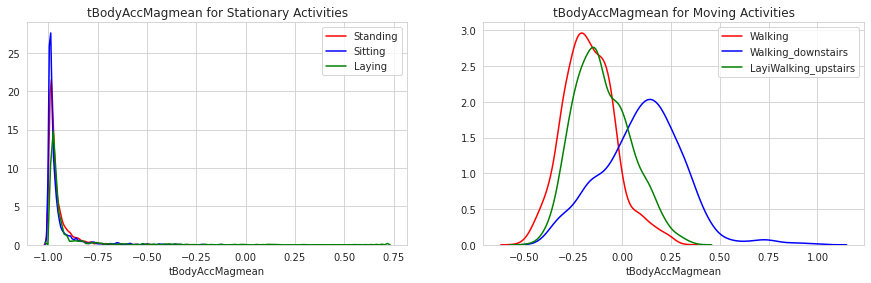

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('tBodyAccMagmean for Moving Activities')
sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccMagmean'],color='b',hist=False,label="Walking_downstairs")
sns.distplot(df6['tBodyAccMagmean'],color='g',hist=False,label="Walking_upstairs")

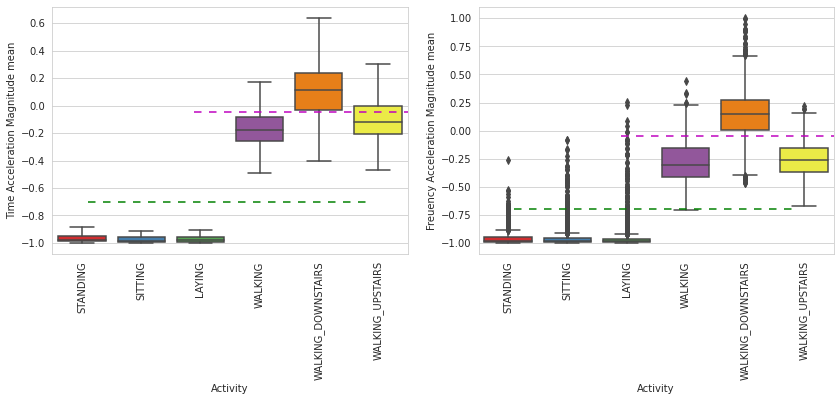

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df, showfliers=False, saturation=1)
plt.ylabel('Time Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y='fBodyAccMagmean',data=df,showfliers=True,saturation=1)
plt.ylabel('Freuency Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

**Observations in time domain**
1. If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
2. If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
3. If tAccMean > 0.0 then the Activity is WalkingDownstairs.
4. We can classify 75% the Acitivity labels with some errors.

**Observations in Frequency domain**
1. If fBodyAccMagmean is < -0.75 then the Activities are either Standing or Sitting or Laying.
2. If fBodyAccMagmean is > -0.5 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
3. If fBodyAccMagmean > 0.0 then the Activity is WalkingDownstairs.
4. We can classify 75% the Acitivity labels with some errors.
<br> However here we can see the outliers


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

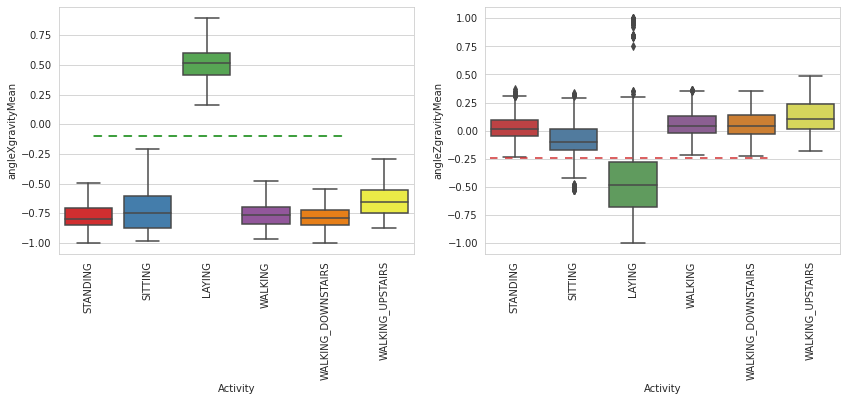

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Activity', y= 'angleXgravityMean',data = df,showfliers=False, saturation=1)
plt.axhline(y=-0.1, xmin = 0.1, xmax= 0.8, dashes=(5,5), c='g',animated = True,dash_capstyle = 'round')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y= 'angleZgravityMean', data = df)
plt.axhline(y=-0.24, xmin=-1, xmax = 0.8, dashes = (5,5))
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

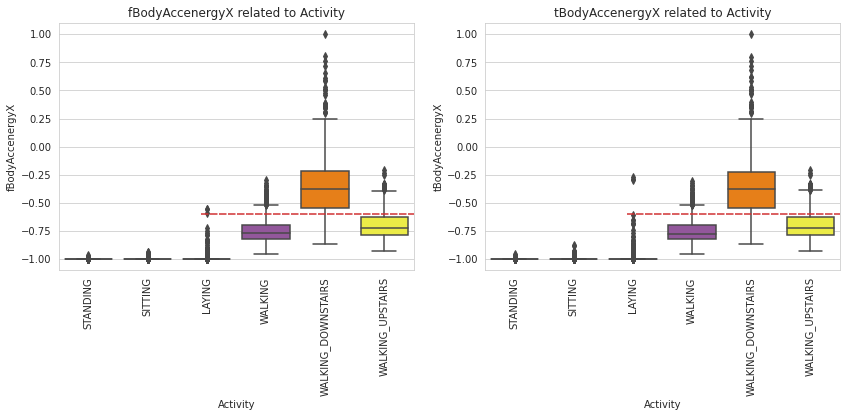

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Activity', y='fBodyAccenergyX', data=df, saturation = 1)
plt.axhline(y= -0.6, xmin = 0.4, xmax = 1.0, dashes = (5,1))
plt.title('fBodyAccenergyX related to Activity')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.boxplot(x = 'Activity', y='tBodyAccenergyX', data=df, saturation = 1)
plt.axhline(y= -0.6, xmin = 0.4, xmax = 1.0, dashes = (5,1))
plt.title('tBodyAccenergyX related to Activity')
plt.xticks(rotation = 90)

**Obserbations**
1. All features are some how differentiate w.r.t. moving activities and stationary activities
2. Body acceleration along X axis w.r.t. Time domain and Frequency domain features helps to conclude walking downstairs activity is differentiable w.r.t. moving activities

#### Somehow all the features looks important here. If any specific feature may not clearly differntiate all activities other features may differentiate.
**TO get more clarifications perform dimensionality reduction**
1. Principal Component Analysis (PCA)
2. t-SNE


## **PCA**


In [ ]:
from sklearn.decomposition import PCA

In [111]:
%%time
pca = PCA(n_components=2)
components = pca.fit_transform(X)
components.shape

CPU times: user 614 ms, sys: 119 ms, total: 733 ms
Wall time: 428 ms


In [ ]:
componentsDataFrame = pd.DataFrame(components,columns=['component1', 'component2'])

Text(0.5, 1.0, '2D Visualization of data using PCA')

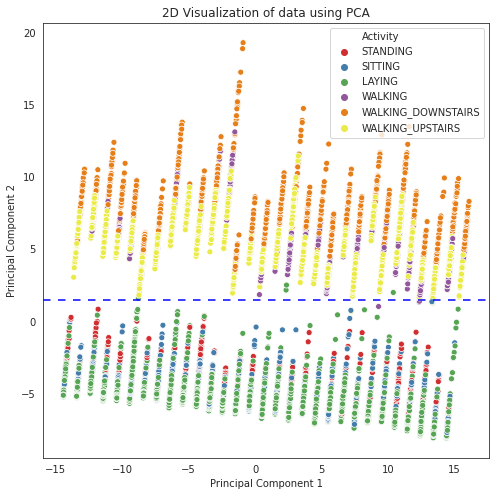

In [ ]:
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.scatterplot(x= 'component1', y = 'component2', hue=y, data=componentsDataFrame)
plt.axhline(y=1.5, xmin = 0, xmax = 1, dashes = (5,5), c = 'b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of data using PCA')

**Observations**
1. 2D visualization of data using PCA shows that there is significant difference between moving and stationary activities
2. PCA based visualization cannot differentiate stationary activities  
2. PCA based visualization cannot differentiate moving activities  

## **t-SNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
%%time
tsne = TSNE(n_components = 2)
tsneComponents = tsne.fit_transform(X)

CPU times: user 2min 51s, sys: 304 ms, total: 2min 51s
Wall time: 1min 49s


In [ ]:
tsneComponents.shape

(10299, 2)

In [ ]:
tsneDataFrame = pd.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2'])

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.710s...
[t-SNE] Computed neighbors for 10299 samples in 27.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 0.715672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.887131
[t-SNE] KL 

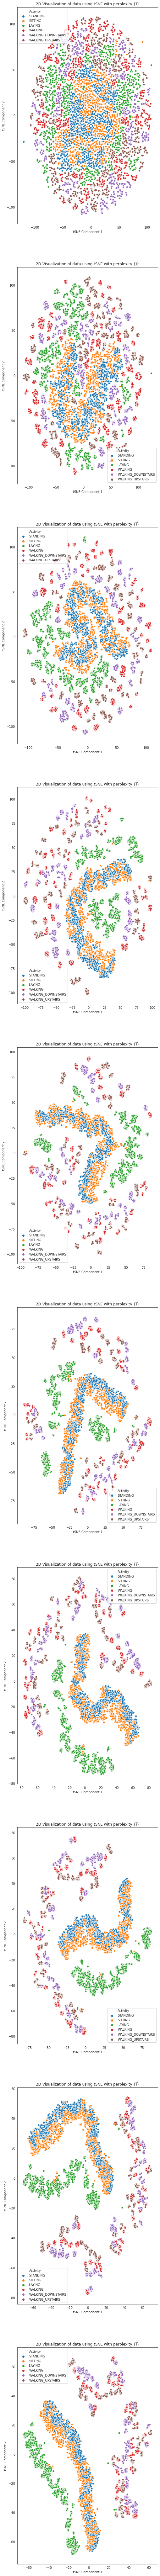

In [ ]:
%%time
perplexities =[2,5,10,20,30,40,50,60,80,100]
sns.set_style('white')
plt.figure(figsize=(8,150))
for i, p in enumerate(perplexities):
  tsne = TSNE(n_components = 2, perplexity=p,verbose=1)
  tsneComponents = tsne.fit_transform(X)
  tsneDataFrame = pd.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2'])
  plt.subplot(10,1,i+1)
  sns.scatterplot(x= 'tsneComponent1', y = 'tsneComponent2', hue=y, data=tsneDataFrame)
  plt.xlabel('tSNE Component 1')
  plt.ylabel('tSNE Component 2')
  plt.title('2D Visualization of data using tSNE with perplexity {i}')

**Observations:**
1. PCA cannot differentiate static activities standing, sitting and laying but using tSNE we can see the difference.  
2. PCA cannot differentiate moving activities standing, sitting and laying but using tSNE we can see the difference.
3. However tSNE shows slight confusion between two activities sitting and standing
4. Finally good new is all classes are seperable :-) 

## **Machine Learning Model Training**
#### **Performance Measures**
  - As this is a classification problem and dataset is almost balanced Accuracy as perrformance metric can be used
  - For the sake of detailed classification report we will use Confusion Matrix and Precision Matrix


In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [94]:
X = df.drop('Activity',inplace=False, axis = 1)
y = df['Activity']

In [95]:
y = y.map({'STANDING': 0, 'SITTING': 1, 'LAYING': 2, 'WALKING':3,'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5})

In [96]:
y.unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
print("shape of y: ",y.shape)
print("shape of X: ",X.shape)

shape of y:  (10299,)
shape of X:  (10299, 562)


#### **Split data into Train, Test, Cross Validation**


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X1,X_test,y1,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size = 0.2, random_state = 10)

In [99]:
print("Number of data points in Train", X_train.shape)
print("Number of data points in Test", X_test.shape)
print("Number of data points in CV", X_cv.shape)

Number of data points in Train (6591, 562)
Number of data points in Test (2060, 562)
Number of data points in CV (1648, 562)


In [100]:
print("Number of data points in Train", y_train.shape)
print("Number of data points in Test", y_test.shape)
print("Number of data points in CV", y_cv.shape)

Number of data points in Train (6591,)
Number of data points in Test (2060,)
Number of data points in CV (1648,)


### Base model - RandomModel
  - To compare the performance we will use a random Model as a benchmark
  - y_pred as random values between 0 - 5 


In [101]:
import numpy as np

In [102]:
np.random.seed(10)
y_pred = np.random.randint(low=0, high=6, size=(X_test.shape[0],))
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [ ]:
y_pred

array([1, 5, 4, ..., 3, 5, 2])

In [ ]:
def printPerformace(actual, prediction, string):
  cf = confusion_matrix(actual,prediction)
  plt.figure(figsize=(14,9))
  plt.subplot(2,2,1)
  sns.heatmap(cf,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Confusion Matrix for " + string)
  
  plt.subplot(2,2,2)
  colSum = np.sum(cf, axis = 0)
  colSum = colSum.reshape(-1,1)
  PrecisionMatrix = cf/colSum
  sns.heatmap(PrecisionMatrix,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Precision Matrix for " + string)

  plt.subplot(2,2,3)
  rowSum = np.sum(cf, axis = 1)
  rowSum = rowSum.reshape(1,-1)
  RecallMatrix = cf/rowSum
  sns.heatmap(RecallMatrix,fmt= ".3g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Recall Matrix for " + string)


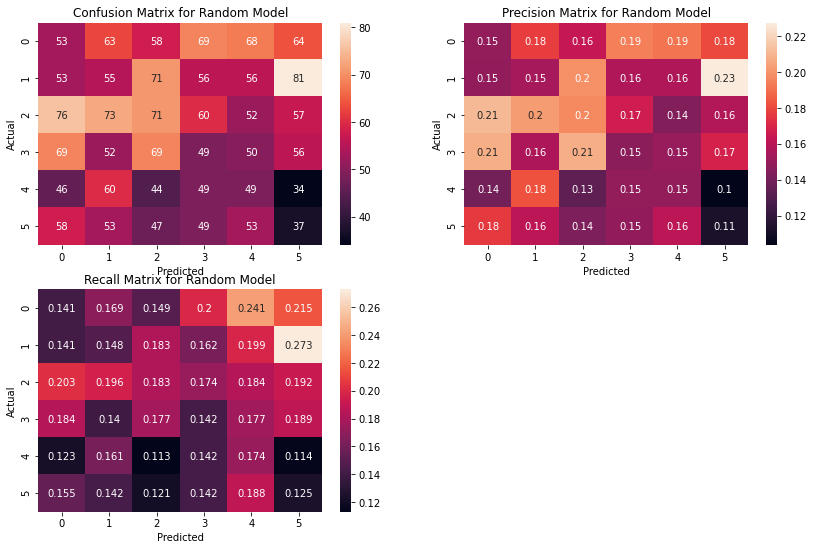

In [ ]:
printPerformace(y_test, y_pred, "Random Model")

In [ ]:
print("Classification report of Randmo Model")
print(classification_report(y_test, y_pred))
print("Accuracy of Random Model: ", accuracy_score(y_test, y_pred))

Classification report of Randmo Model
              precision    recall  f1-score   support

           0       0.15      0.14      0.15       375
           1       0.15      0.15      0.15       372
           2       0.20      0.18      0.19       389
           3       0.15      0.14      0.14       345
           4       0.15      0.17      0.16       282
           5       0.11      0.12      0.12       297

    accuracy                           0.15      2060
   macro avg       0.15      0.15      0.15      2060
weighted avg       0.15      0.15      0.15      2060

Accuracy of Random Model:  0.1524271844660194


## KNN


In [105]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

In [106]:
%%time
neighbor = [3,7,11,15,19,21,27,31,37,41]
accuracies = []
for k in tqdm(neighbor):
  clfKNN = KNeighborsClassifier(n_neighbors = k)
  clfKNN.fit(X_train,y_train)
  y_predKNN = clfKNN.predict(X_cv)
  accuracies.append(accuracy_score(y_cv, y_predKNN))

100%|██████████| 10/10 [00:47<00:00,  4.78s/it]

CPU times: user 47.6 s, sys: 41 ms, total: 47.7 s
Wall time: 47.8 s


In [107]:
bestK = neighbor[accuracies.index(max(accuracies))]
bestK

3

In [108]:
clfKNN = KNeighborsClassifier(n_neighbors = bestK)
clfKNN.fit(X_train,y_train)
y_predKNN = clfKNN.predict(X_test)

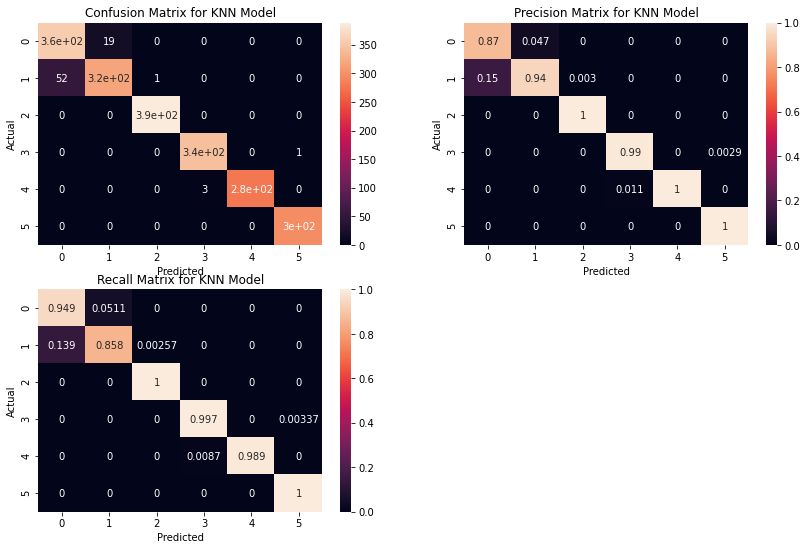

In [109]:
printPerformace(y_test, y_predKNN, "KNN Model")

In [110]:
print("Classification report of KNN Model")
print(classification_report(y_test, y_predKNN))
print("Accuracy of Random Model: ", accuracy_score(y_test, y_predKNN))

Classification report of KNN Model
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       375
           1       0.94      0.86      0.90       372
           2       1.00      1.00      1.00       389
           3       0.99      1.00      0.99       345
           4       1.00      0.99      0.99       282
           5       1.00      1.00      1.00       297

    accuracy                           0.96      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.96      0.96      0.96      2060

Accuracy of Random Model:  0.9631067961165048


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

In [ ]:
%%time
lamda = [10**x for x in range(-4,4,1)]
accuracies = []
for l in tqdm(lamda):
  clfLR = LogisticRegression(penalty = 'l2', C = l, n_jobs=-1)
  clfLR.fit(X_train,y_train)
  y_predLR = clfLR.predict(X_cv)
  acc = accuracy_score(y_cv, y_predLR)
  accuracies.append(acc)

100%|██████████| 8/8 [00:30<00:00,  3.77s/it]

CPU times: user 564 ms, sys: 780 ms, total: 1.34 s
Wall time: 30.2 s


In [ ]:
%%time
bestLamda = lamda[accuracies.index(max(accuracies))]
clfLR = LogisticRegression(penalty = 'l2', C = bestLamda, max_iter = 1000, solver = 'liblinear')
clfLR.fit(X_train,y_train)
y_predLR = clfLR.predict(X_test)
print("Final Accuracy: ", accuracy_score(y_test,y_predLR))

Final Accuracy:  0.9781553398058253
CPU times: user 7.24 s, sys: 8.01 ms, total: 7.25 s
Wall time: 7.25 s


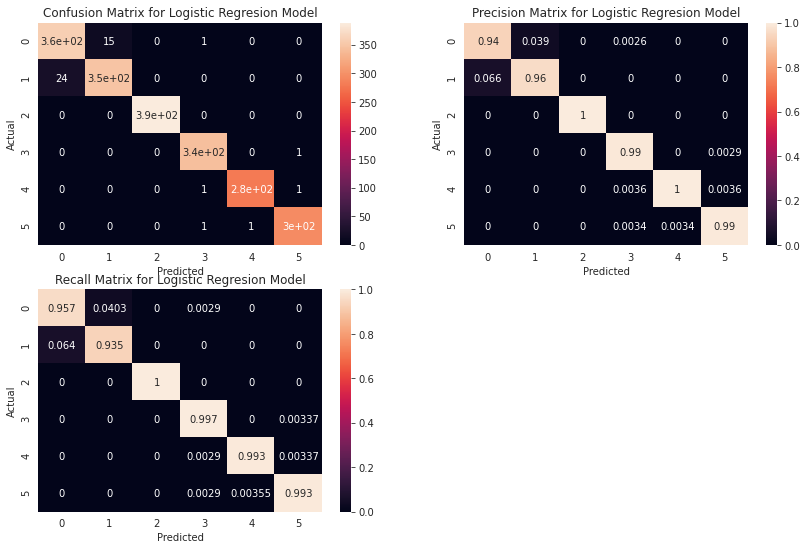

In [ ]:
printPerformace(y_test, y_predLR, "Logistic Regresion Model")

In [ ]:
print("Classification report of Logistic Regresion Model")
print(classification_report(y_test, y_predLR))
print("Accuracy of Logistic Regresion Model: ", accuracy_score(y_test, y_predLR))

Classification report of Logistic Regresion Model
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       375
           1       0.96      0.94      0.95       372
           2       1.00      1.00      1.00       389
           3       0.99      1.00      0.99       345
           4       1.00      0.99      0.99       282
           5       0.99      0.99      0.99       297

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Accuracy of Logistic Regresion Model:  0.9781553398058253


**SVM Classifier**


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'kernel': ['linear','rbf','poly'],
    'degree': [2,3],
    'C': [10**x for x in range(-3,3,1)],
    'gamma': [-0.01, -0.1, 0.0, 0.01, 0.1]
}

In [ ]:
%%time
clfSVC = SVC()
GridSVC = GridSearchCV(clfSVC, param_grid=parameters, n_jobs=-1,verbose = 1)
GridSVC.fit(X1,y1)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed: 90.8min
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed: 139.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 147.6min finished


CPU times: user 12.3 s, sys: 617 ms, total: 12.9 s
Wall time: 2h 27min 46s


In [ ]:
bestSVC = GridSVC.best_estimator_
bestSVC.fit(X1,y1)
y_predSVC = bestSVC.predict(X_test)

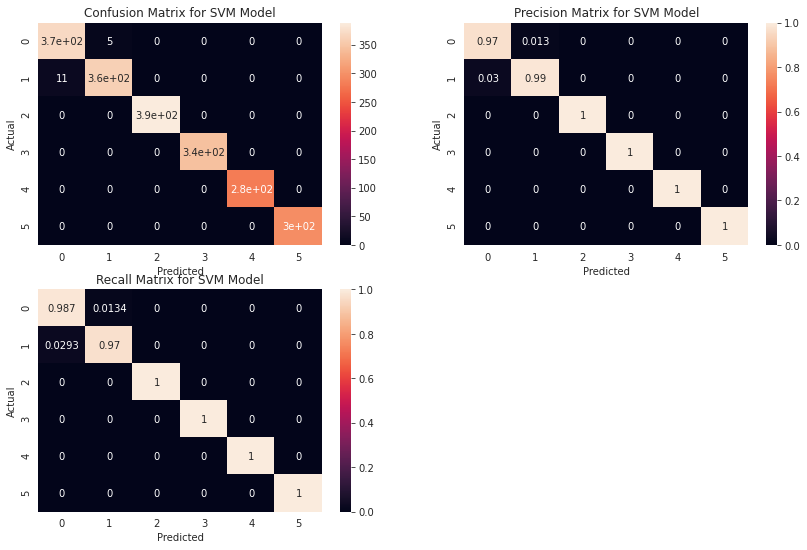

In [ ]:
printPerformace(y_test, y_predSVC, "SVM Model")

In [ ]:
print("Classification report of SVM Model")
print(classification_report(y_test, y_predSVC))
print("Accuracy of SVM Model: ", accuracy_score(y_test, y_predSVC))

Classification report of SVM Model
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       375
           1       0.99      0.97      0.98       372
           2       1.00      1.00      1.00       389
           3       1.00      1.00      1.00       345
           4       1.00      1.00      1.00       282
           5       1.00      1.00      1.00       297

    accuracy                           0.99      2060
   macro avg       0.99      0.99      0.99      2060
weighted avg       0.99      0.99      0.99      2060

Accuracy of SVM Model:  0.9922330097087378


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,7,9,10]
}

In [ ]:
clfDT = DecisionTreeClassifier()
gridDT = GridSearchCV(clfDT,param_grid=DTparameters,verbose = 3, n_jobs = -1)
gridDT.fit(X1,y1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
bestDT = gridDT.best_estimator_
bestDT.fit(X1,y1)
y_predDT = bestDT.predict(X_test)

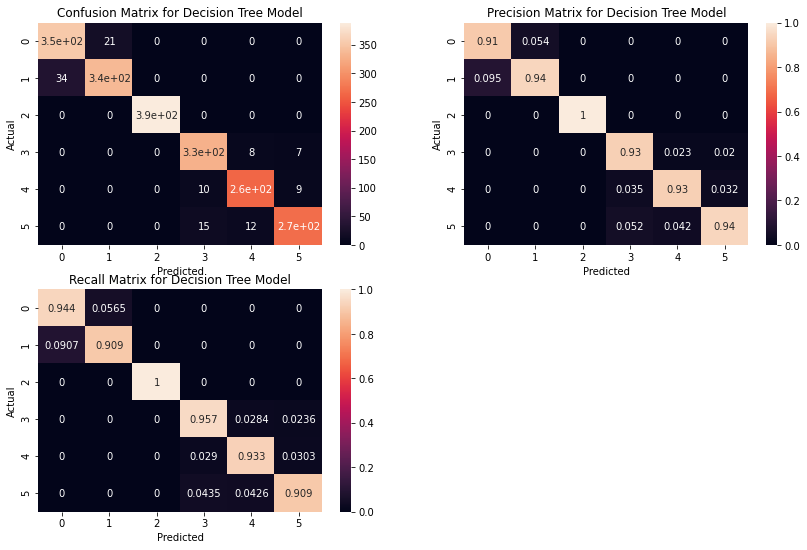

In [ ]:
printPerformace(y_test, y_predDT, "Decision Tree Model")

In [ ]:
print("Classification report of DT Model")
print(classification_report(y_test, y_predDT))
print("Accuracy of DT Model: ", accuracy_score(y_test, y_predDT))

Classification report of DT Model
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       375
           1       0.94      0.91      0.92       372
           2       1.00      1.00      1.00       389
           3       0.93      0.96      0.94       345
           4       0.93      0.93      0.93       282
           5       0.94      0.91      0.93       297

    accuracy                           0.94      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.94      0.94      0.94      2060

Accuracy of DT Model:  0.9436893203883495


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [ ]:
%%time
cvAccuracies = []
for estim in tqdm(range(100,500,50)):
    for maxDepth in tqdm(range(10,20,1)):
      clfRF = RandomForestClassifier(n_estimators = estim, max_depth = maxDepth)
      clfRF.fit(X_train, y_train)
      y_predRFcv = clfRF.predict(X_cv)
      cvAcc = accuracy_score(y_cv,y_predRFcv)
      cvAccuracies.append(cvAcc)

100%|██████████| 8/8 [40:08<00:00, 301.06s/it]

CPU times: user 40min 4s, sys: 933 ms, total: 40min 5s
Wall time: 40min 8s


Text(0.5, 1.0, 'CV and Train error for Random Forest Classifier')

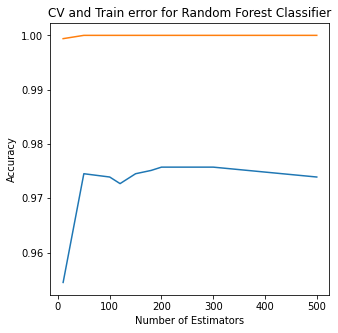

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(numIst, cvAccuracies,numIst, trainAccuracies,)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("CV and Train error for Random Forest Classifier")


In [ ]:
clfRF = RandomForestClassifier(n_estimators = 200)
clfRF.fit(X_train,y_train)
y_predRF = clfRF.predict(X_test)

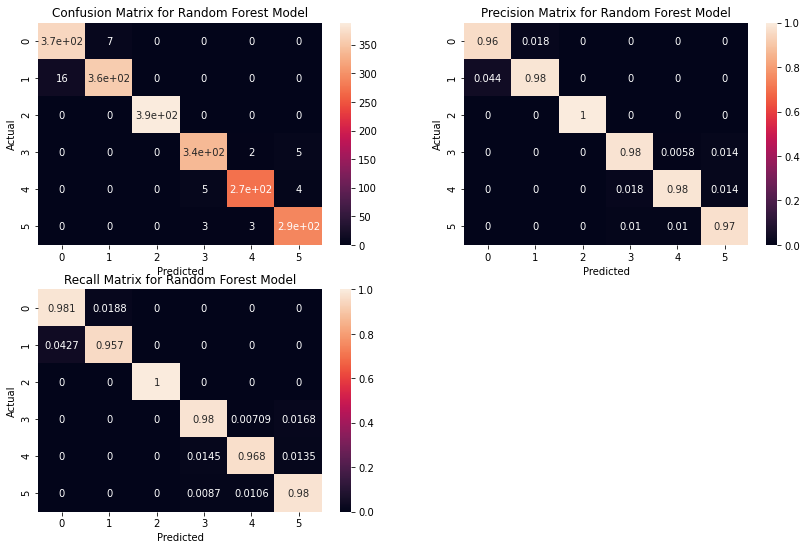

In [ ]:
printPerformace(y_test, y_predRF, "Random Forest Model")

In [ ]:
print("Classification report of Random Forest Model")
print(classification_report(y_test, y_predRF))
print("Accuracy of Random Forest Model: ", accuracy_score(y_test, y_predRF))

Classification report of Random Forest Model
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       375
           1       0.98      0.96      0.97       372
           2       1.00      1.00      1.00       389
           3       0.98      0.98      0.98       345
           4       0.98      0.97      0.97       282
           5       0.97      0.98      0.97       297

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Accuracy of Random Forest Model:  0.9781553398058253


### **XGBOOST**

In [ ]:
!sudo pip install xgboost

In [ ]:
!sudo pip install --upgrade xgboost

     |████████████████████████████████| 127.6MB 97kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
param = {'eta': 0.1, 'colsample_bytree' : 0.3, 'max_depth': 5, 'objective': 'multi:softmax', 'num_class': 6,
                          'n_estimators':300, 'alpha' : 10, 'silent': True, 'verbose_eval': False }
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix( X_test, y_test)

In [ ]:
%%time
num_round = 100
bst = xgb.train(param, dtrain, num_round)

[08:21:19] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators, silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


CPU times: user 1min 57s, sys: 71.7 ms, total: 1min 57s
Wall time: 1min 2s


In [ ]:
y_predXG = bst.predict(dtest)

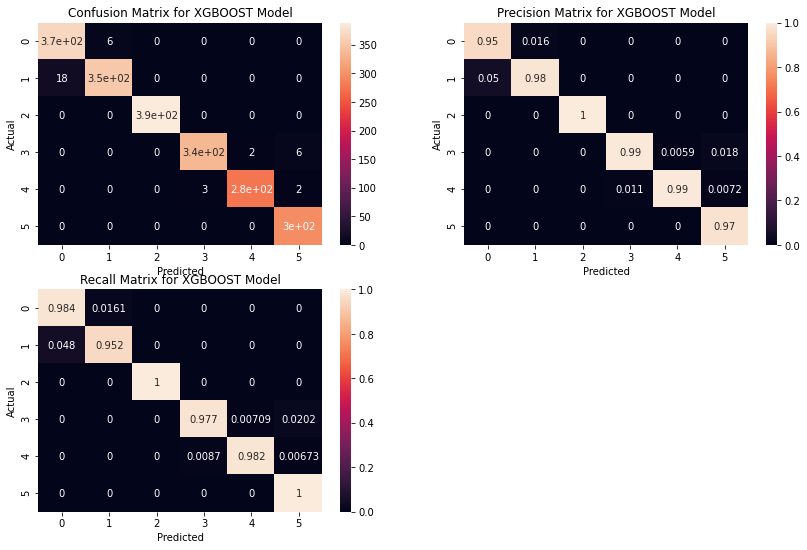

In [ ]:
printPerformace(y_test, y_predXG, "XGBOOST Model")

In [ ]:
print("Classification report of XGBOOST Model")
print(classification_report(y_test, y_predXG))
print("Accuracy of XGBOOST Model: ", accuracy_score(y_test, y_predXG))

Classification report of XGBOOST Model
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       375
           1       0.98      0.95      0.97       372
           2       1.00      1.00      1.00       389
           3       0.99      0.98      0.98       345
           4       0.99      0.98      0.99       282
           5       0.97      1.00      0.99       297

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Accuracy of XGBOOST Model:  0.9820388349514563


## **Final Accuracies**

        Model              Accuracy         Precision
    Random Model             15.2             15
    Logistic Regression      97.81            98
    SVM Classifier           99.2233          99
    Decision Tree            94.3689          94
    Random Forest            97.8155          98
    XGBOOST                  98.20            98

